<a href="https://colab.research.google.com/github/GAKIZAB/Projet-Machine-learning-avec-Python/blob/main/Pr%C3%A9diction%20et%20selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet : Prédiction de la popularité des articles**
# **Introduction**
Dans ce projet, nous nous penchons sur la prédiction de la popularité d'articles en nous appuyant sur leurs métadonnées. L'objectif est de concevoir un modèle de machine learning capable de prédire avec précision le niveau de popularité d'un article en se basant sur les informations descriptives qui lui sont associées. Nous visons également à comparer diverses méthodes de prédiction en intégrant des techniques de réduction de dimension, tout en évaluant l'importance des variables impliquées.

# **1. Chargement et préparation de données réelles**

## **1.1 Chargement des Données**



In [46]:
# importattion des données
import pandas as pd

data = pd.read_csv('OnlineNewsPopularity.csv')
data.head(3)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500


In [47]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

Notre metadonnées contient:

1) 1 variables qualitative :

  url : URL de l’article

2) 45 variable quantitative :

  - timedelta : Jours entre la publication de l’article et l’acquisition du jeu de données
  - n_tokens_title : Nombre de mots dans le titre
  - n_tokens_content : Nombre de mots dans le contenu
  - n_unique_tokens : Taux de mots uniques dans le contenu
  - n_non_stop_words : Taux de mots non-stop dans le contenu
  - n_non_stop_unique_tokens : Taux de mots uniques non-stop dans le contenu
  - num_hrefs : Nombre de liens
  - num_self_hrefs : Nombre de liens vers d’autres articles publiés par Mashable
  - num_imgs : Nombre d’images
  - num_videos : Nombre de vidéos
  - average_token_length : Longueur moyenne des mots dans le contenu
  - num_keywords : Nombre de mots-clés dans les métadonnées 13
  - kw_min_min : Pire mot-clé (min. partages)
  - kw_max_min : Mot-clé le plus mauvais (max. partages)
  - kw_avg_min : Mot-clé le plus mauvais (partages moyens)
  - kw_min_max : Meilleur mot-clé (partages minimum)
  - kw_max_max : Meilleur mot-clé (partages max.)
  - kw_avg_max : Meilleur mot-clé (partages moyens)
  - kw_min_avg : mot-clé moyen (partages min.)
  - kw_max_avg : mot-clé moyen (partages max.)
  - kw_avg_avg : mot-clé moyen (partages moyens)
  - self_reference_min_shares : Parts minimales des articles référencés dans Mashable
  - self_reference_max_shares : Partages max. d’articles référencés dans Mashable
  - self_reference_avg_sharess : Partages moyens des articles référencés dans Mashable
  - LDA_00 : Proximité avec le thème LDA 0
  - LDA_01 : Proximité avec le thème 1 de l’LDA
  - LDA_02 : Proximité avec le thème 2 de l’LDA
  - LDA_03 : Proximité avec le thème 3 de la LDA
  - LDA_04 : Proximité avec le thème 4 de l’LDA
  - global_subjectivity : Subjectivité du texte
  - global_sentiment_polarity : Polarité des sentiments du texte
  - global_rate_positive_words : Taux de mots positifs dans le contenu
  - global_rate_negative_words : Taux de mots négatifs dans le contenu
  - rate_positive_words : Taux de mots positifs parmi les tokens non neutres
  - rate_negative_words : Taux de mots négatifs parmi les tokens non neutres
  - avg_positive_polarity : Polarité moyenne des mots positifs
  - min_positive_polarity : Polarité minimale des mots positifs
  - max_positive_polarity : Polarité maximale des mots positifs
  - avg_negative_polarity : Polarité moyenne des mots négatifs
  - min_negative_polarity : Polarité minimale des mots négatifs
  - max_negative_polarity : Polarité maximale des mots négatifs
  - title_subjectivity : Subjectivité du titre
  - title_sentiment_polarity : Polarité du titre
  - abs_title_subjectivity : Niveau de subjectivité absolu
  - abs_title_sentiment_polarity : Niveau de polarité absolu

3) 14 variables binaire :
  - data_channel_is_lifestyle : Le canal de données est-il « Lifestyle » ?
  - data_channel_is_entertainment : La chaîne de données est-elle « Entertainment » ?
  - data_channel_is_bus : Le canal de données est-il « Business » ?
  - data_channel_is_socmed : Le canal de données est-il un « média social » ?
  - data_channel_is_tech : Le canal de données est-il « Tech » ?
  - data_channel_is_world : Le canal de données est-il « World » ?
  - weekday_is_monday : L’article a-t-il été publié un lundi ?
  - weekday_is_tuesday : L’article a-t-il été publié un mardi ?
  - weekday_is_wednesday : L’article a-t-il été publié un mercredi ?
  - weekday_is_thursday : L’article a-t-il été publié un jeudi ?
  - weekday_is_friday : L’article a-t-il été publié un vendredi ?
  - weekday_is_saturday : L’article a-t-il été publié un samedi ?
  - weekday_is_sunday : L’article a-t-il été publié un dimanche ?
  - is_weekend : L’article a-t-il été publié ce week-end ?

4) variable cible qui est quantitative
  - shares : Nombre de partage


In [48]:
# Suppression des espaces devant les noms des variables
data.columns = data.columns.str.strip()

In [49]:
pip install umap-learn

In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

## **1.2 Analyse Exploratoire**

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [52]:
# Desciption des données
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [53]:
# Liste des colonnes des chaînes
data_channel = ['data_channel_is_lifestyle', 'data_channel_is_entertainment',
                'data_channel_is_bus', 'data_channel_is_socmed',
                'data_channel_is_tech', 'data_channel_is_world']

# Fonction pour combiner les chaînes associées à chaque ligne
def channel(row):
    # Sélectionne les colonnes où la valeur est 1
    channels = [channel.replace('data_channel_is_', '') for channel in data_channel if row[channel] == 1]
    return ', '.join(channels) if channels else 'Others'

# Application de la fonction sur chaque ligne
data_new = data.copy()
data_new['channel'] = data_new.apply(channel, axis=1)

Pour gérer les articles qui ne sont pas attribués à une chaîne spécifique, nous les avons regroupés sous la catégorie 'Others'.

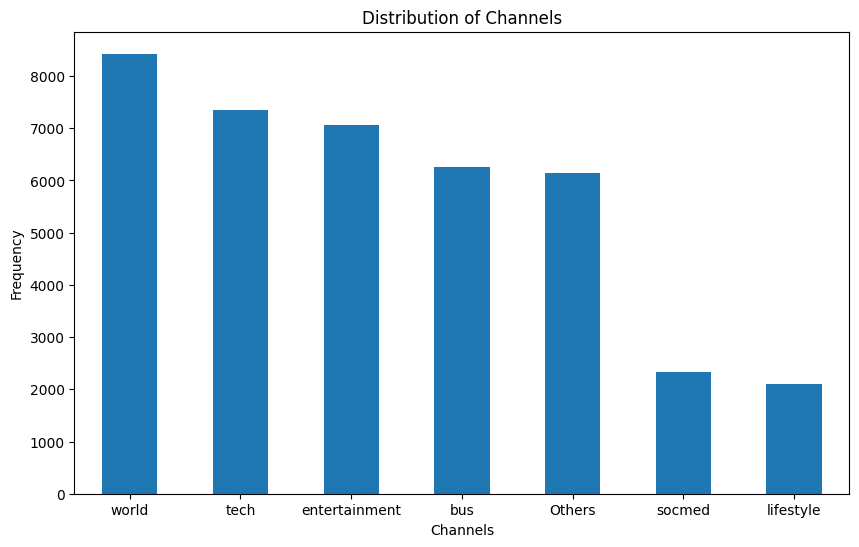

In [54]:
# Calculer la fréquence de chaque chaînes
channel_counts = data_new['channel'].value_counts()

# Visualisation
channel_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Channels')
plt.xlabel('Channels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

La majorité des articles appartiennent à la chaîne 'world', avec plus de 8 000 articles. À l'inverse, les chaînes 'socmed' et 'lifestyle' sont les moins représentées, avec moins de 3 000 articles chacune. La catégorie 'others' se situe autour de 6 000 articles.

<ipython-input-55-51459e8b8597>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='channel', y='shares',  data=data_new, palette='Set2')


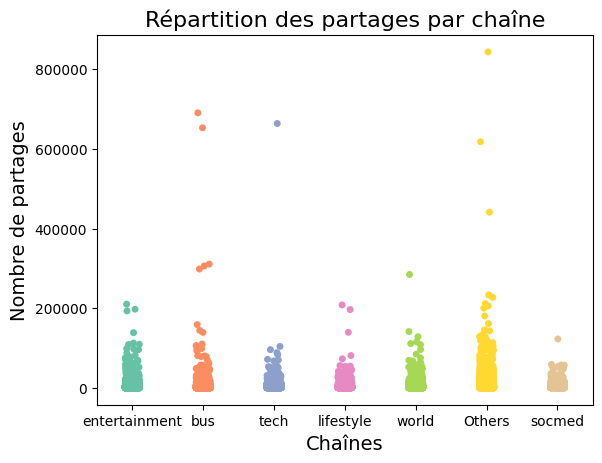

In [55]:
# Création d'un stripplot pour la visualisation
sns.stripplot(x='channel', y='shares',  data=data_new, palette='Set2')
plt.title('Répartition des partages par chaîne', fontsize=16)
plt.xlabel('Chaînes', fontsize=14)
plt.ylabel('Nombre de partages', fontsize=14)

# Affichage du graphique
plt.show()


On constate que les articles de la chaîne 'bus' comptent 5 articles ayant été partagés plus de 200 000 fois, contre seulement 1 article pour les chaînes 'tech' et 'entertainment'. La catégorie 'others' se distingue avec plusieurs articles très partagés, dont un atteignant un record de plus de 800 000 partages.

### **Corrélations des variables quantitatives**

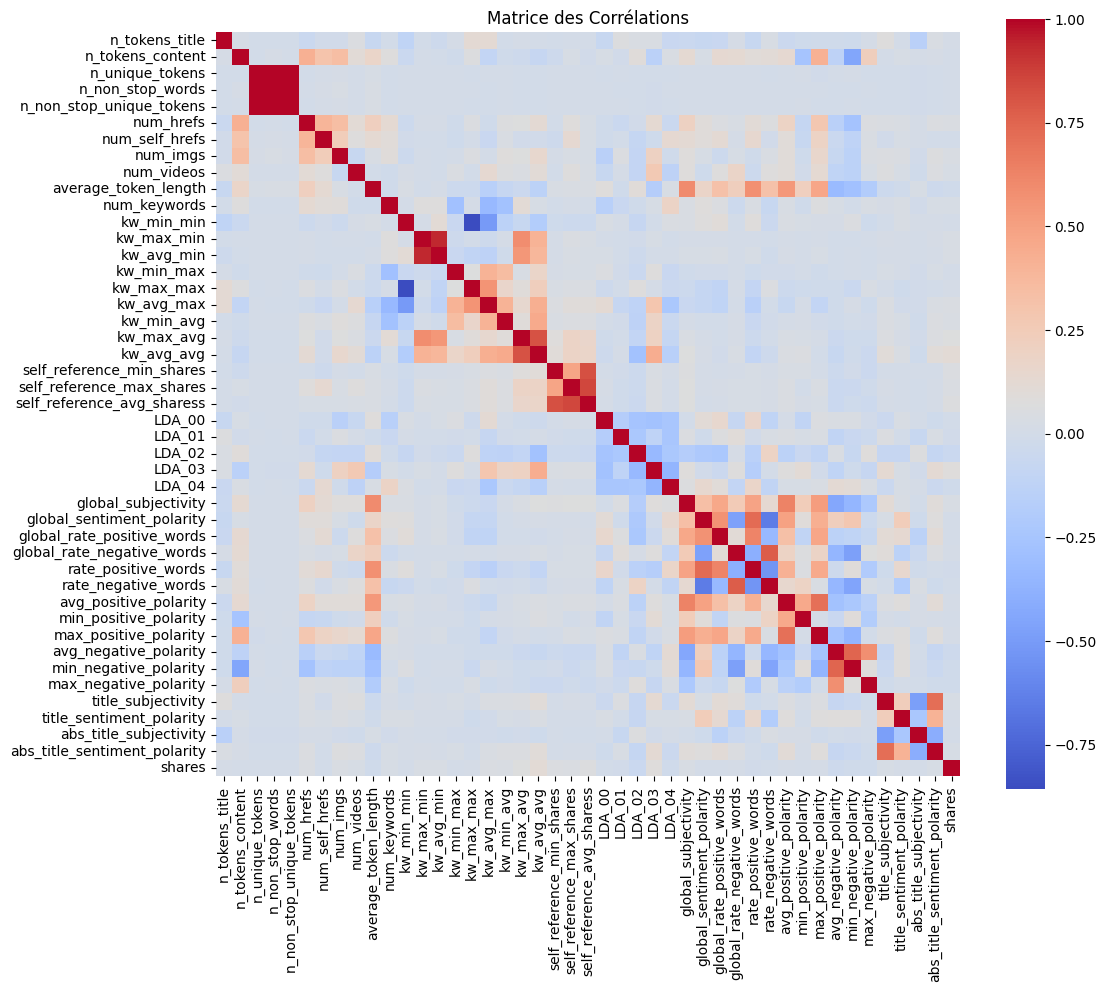

In [56]:
# Identification des colonnes numériques uniquement
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Suppression des colonnes non pertinentes comme 'timedelta', ou toute autre variable qualitative
filtered_data = data[numeric_columns].drop(['timedelta'], axis=1)

# Filtrage des variables binaires (nombre de valeurs uniques <= 2)
non_binary_columns = [col for col in filtered_data.columns if data[col].nunique() > 2]

# Création d'un sous-ensemble sans variables binaires
filtered_data_no_binary = filtered_data[non_binary_columns]

# Calcul des corrélations entre toutes les variables quantitatives
correlation_matrix = filtered_data_no_binary.corr()

# Heatmap des corrélations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Matrice des Corrélations")
plt.show()



Les variables présentant les corrélations les plus élevées sont les suivantes :

n_non_stop_words et n_unique_tokens ;
n_non_stop_unique_tokens et n_unique_tokens ;
n_non_stop_unique_tokens et n_non_stop_words.
Ces fortes corrélations suggèrent des similarités dans la manière dont ces variables sont calculées, car elles mesurent des aspects liés au nombre de mots uniques ou non redondants dans les articles.

### **Description de la variable cible**


In [57]:
# Description de la variable cible
data['shares'].describe()

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


Text(0.5, 1.0, 'Boxplot de la variable cible')

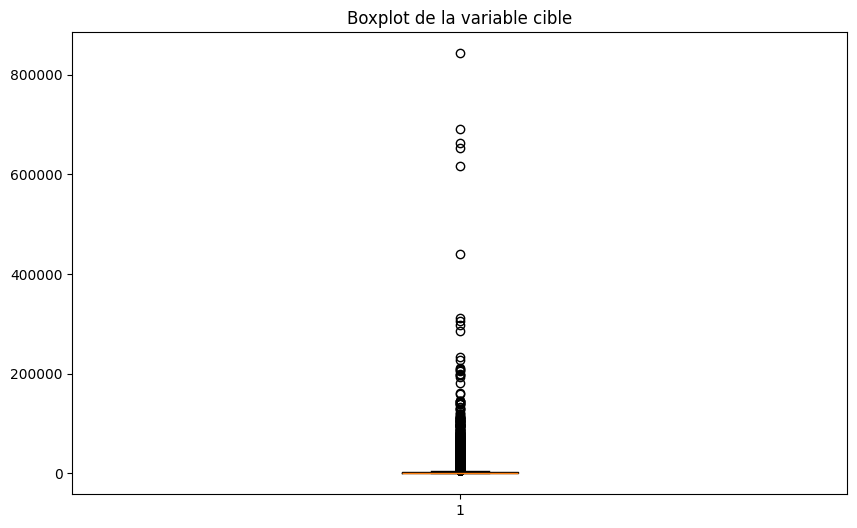

In [58]:
# Visualisation
plt.figure(figsize=(10, 6))
plt.boxplot(data['shares'])
plt.title('Boxplot de la variable cible')

La distribution des partages présente une forte asymétrie, avec une moyenne de 3 395 largement supérieure à la médiane de 1 400. Cela reflète que la majorité des articles obtient un nombre de partages relativement modeste, tandis qu'une petite fraction atteint des niveaux de viralité exceptionnellement élevés

In [59]:
# Identification des colonnes numériques uniquement
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Suppression des colonnes non pertinentes comme 'url', 'timedelta'
filtered_data = data[numeric_columns].drop(['timedelta'], axis=1)

# Calcul des corrélations avec la variable cible 'shares'
correlations = filtered_data_no_binary.corr()['shares'].dropna().sort_values(ascending=False)[1:]

# Affichage des corrélations
correlations.head(3)


,shares
kw_avg_avg,0.110413
LDA_03,0.083771
kw_max_avg,0.064306


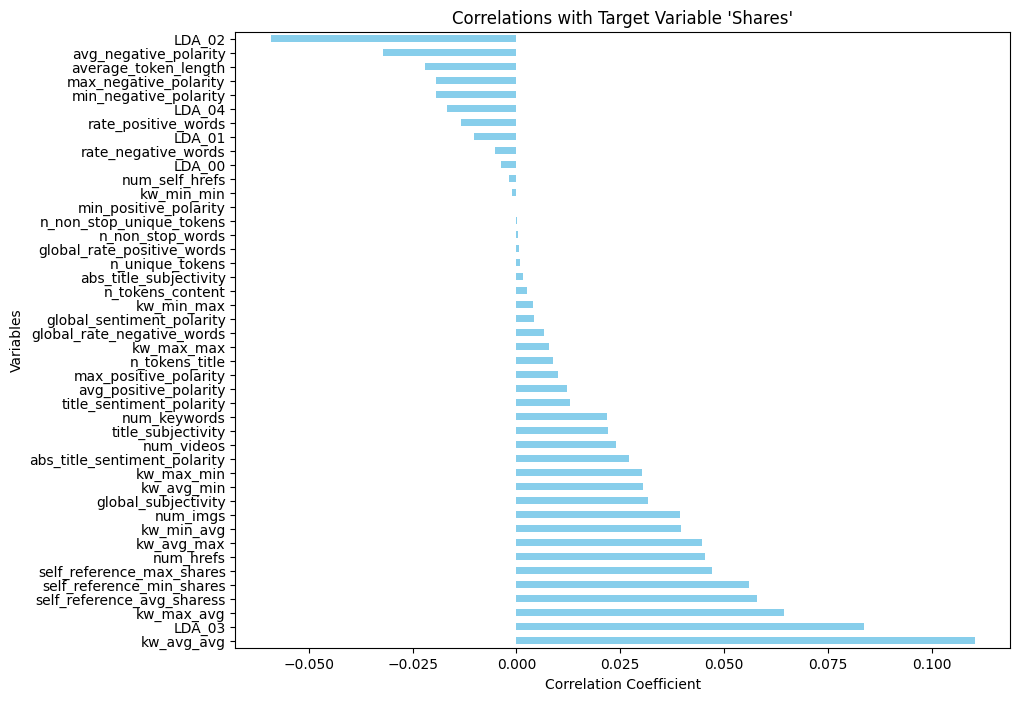

In [60]:
# Créer un graphique en barres horizontales
plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color='skyblue')
plt.title("Correlations with Target Variable 'Shares'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variables")
plt.show()


L'analyse montre que la viralité, mesurée par le nombre de partages (shares), est principalement influencée par des facteurs éditoriaux spécifiques. Parmi eux, les mots-clés pertinents (kw_avg_avg, kw_max_avg) et les références aux articles précédents (self_reference_avg_sharess, self_reference_min_shares, self_reference_max_shares) se démarquent comme les plus fortement corrélés aux partages. L'enrichissement du contenu par des médias, tels que les images (num_imgs) ou les vidéos (num_videos), joue également un rôle positif, bien que modéré.

En revanche, la longueur du contenu (n_tokens_content, average_token_length) et la tonalité des mots (global_sentiment_polarity, avg_positive_polarity, avg_negative_polarity) semblent avoir une influence négligeable.

# **2. Prédiction**

Dans cette section, nous allons prédire la popularité des articles en les classant dans l'une des deux catégories suivantes : "populaire" ou "non populaire". Après plusieurs essais, nous avons établi un seuil de 1400 partages pour cette classification. Ce seuil a été choisi car il garantit de maximiser le nombre d'articles véritablement populaires tout en minimisant ceux qui ne le sont pas. Ainsi, les articles dont le nombre de partages dépasse ce seuil seront considérés comme populaires, tandis que les autres seront catégorisés comme non populaires.  

Pour effectuer cette classification, nous utiliserons trois méthodes de classification : **Random Forest**, **k-Nearest Neighbors (kNN)** et **Support Vector Machines (SVM)**. Ces méthodes seront testées dans trois configurations :  
1. **Sans réduction de dimension**, en utilisant toutes les variables disponibles.  
2. **Avec une réduction de dimension par Analyse en Composantes Principales (ACP)**, une méthode linéaire.  
3. **Avec une réduction de dimension par Uniform Manifold Approximation and Projection (UMAP)**, une méthode non linéaire.



## **2.1. Méthodes de Classification**

### **a. Random Forest (Forêt aléatoire)**
Random Forest est un algorithme d'ensemble qui construit plusieurs arbres de décision sur des sous-échantillons aléatoires du dataset. La classe finale est déterminée par la majorité des votes des arbres.
- **Avantages** :
  - Robuste face au surapprentissage.
  - Gère bien les variables non linéaires et les données bruitées.
  - Indique l'importance relative des variables.  
- **Inconvénients** :
  - Peut être coûteux en temps de calcul pour des jeux de données volumineux.
  - Moins performant pour des données avec très peu de variables explicatives.


### **b. k-Nearest Neighbors (kNN)**
kNN attribue une classe à un article en fonction des "k" articles les plus proches dans l'espace des variables. La proximité est mesurée à l’aide de distances comme la distance euclidienne.
- **Avantages** :
  - Simple à implémenter et facile à comprendre.
  - Non paramétrique : aucune hypothèse préalable sur la distribution des données.
- **Inconvénients** :
  - Sensible à l'échelle des variables et aux données bruitées.
  - Inefficace pour de grands datasets en termes de temps de calcul.


#### **c. Support Vector Machines (SVM)**
SVM cherche à maximiser la marge entre les deux classes en trouvant un hyperplan optimal dans l'espace des variables. Peut être étendu à des problèmes non linéaires avec des noyaux (kernel).
- **Avantages** :
  - Performant pour des données bien séparées ou de taille moyenne.
  - Les noyaux permettent de capturer des relations non linéaires.
- **Inconvénients** :
  - Sensible au choix des hyperparamètres et des noyaux.
  - Peut être lent pour des datasets volumineux.


## **2.1 Méthodes de Réduction de Dimension**

#### **a. Sans réduction de dimension** :
Toutes les variables sont utilisées telles quelles.  
- **Avantages** :
  - Pas de perte d'information due à la réduction.
  - Méthode directe et simple à implémenter.
- **Inconvénients** :
  - Peut entraîner une surcharge computationnelle.
  - Moins efficace si les variables sont fortement corrélées ou redondantes.



#### **b. Analyse en Composantes Principales (ACP)** :
ACP réduit la dimensionnalité des données en projetant celles-ci sur des axes capturant la variance maximale.
- **Avantages** :
  - Élimine les redondances en se basant sur des combinaisons linéaires des variables.
  - Réduit les variables corrélées à des dimensions indépendantes.
- **Inconvénients** :
  - Peut perdre des informations importantes si la variance expliquée par les premières composantes est faible.
  - Ne capture pas bien les relations non linéaires.



#### **c. Uniform Manifold Approximation and Projection (UMAP)** :
UMAP est une méthode non linéaire qui réduit la dimensionnalité tout en conservant la structure locale et globale des données.
- **Avantages** :
  - Idéal pour des relations complexes et non linéaires.
  - Génère des visualisations compactes et interprétables.
- **Inconvénients** :
  - Nécessite un réglage des hyperparamètres (nombre de voisins, distance minimale).
  - Peut perdre des informations globales si mal configuré.


### **Les 9 Combinaisons de Méthodes**
Nous évaluerons les performances des trois méthodes de classification (Random Forest, kNN, SVM) combinées avec les trois options de réduction de dimension (aucune, ACP, UMAP). Voici les avantages et inconvénients pour chaque combinaison :

| **Méthode**          | **Sans Réduction**               | **ACP**                          | **UMAP**                         |
|-----------------------|----------------------------------|-----------------------------------|-----------------------------------|
| **Random Forest**     | - Avantages : exploite bien toutes les variables. <br> - Inconvénients : temps de calcul élevé si données volumineuses. | - Avantages : réduction des redondances. <br> - Inconvénients : possible perte d'informations. | - Avantages : gère bien les relations complexes. <br> - Inconvénients : nécessite une configuration optimale. |
| **kNN**              | - Avantages : simple à implémenter. <br> - Inconvénients : sensible aux variables inutiles. | - Avantages : données plus compactes et distances plus pertinentes. <br> - Inconvénients : moins efficace pour de faibles variances. | - Avantages : efficace pour des données non linéaires. <br> - Inconvénients : computationnellement lourd. |
| **SVM**              | - Avantages : précis pour les données bien séparées. <br> - Inconvénients : sensible à la dimension élevée. | - Avantages : réduit la complexité du modèle. <br> - Inconvénients : nécessite un réglage des composantes. | - Avantages : adapte bien les relations non linéaires. <br> - Inconvénients : configuration plus complexe. |


### **Choix de la Meilleure Méthode**

Après avoir expérimenté différentes combinaisons, nous choisirons la méthode qui présente le meilleur équilibre entre précision, temps de calcul et interprétabilité. Cependant, l'évaluation des performances réelles sera réalisée de manière empirique, en nous appuyant sur des métriques de classification telles que la précision, le F1-score et le recall.

## **2.2 Convertir la variable cible 'shares' en une variable catégorielle**

In [61]:
# Convertir la variable cible 'shares' en une variable catégorielle
bins = [0,  1400, float('inf')]
labels = ['Pas_Populaire', 'Populaire']
data['popularity'] = pd.cut(data['shares'], bins=bins, labels=labels)


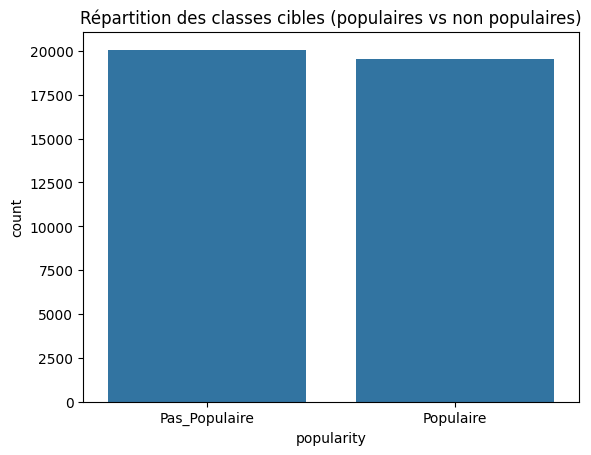

In [62]:
# Analyse de la variable cible
sns.countplot(x='popularity', data=data)
plt.title("Répartition des classes cibles (populaires vs non populaires)")
plt.show()

Les variables url et timedelta seront supprimées de l’analyse, car elles ne sont pas pertinentes pour la prédiction. La variable url est un identifiant unique sans lien direct avec les caractéristiques des articles, tandis que timedelta, bien qu’indiquant un intervalle de temps, ne fournit pas d'information utile pour expliquer ou prédire la popularité des articles.

In [63]:
#supprimer les variables non prédictives
data = data.drop(columns=['url','timedelta'], axis=1)

## **2.3 Préparation des Données pour la Modélisation : Séparation, Standardisation**

In [64]:
# Suppression de la colonne 'shares'
df = data.drop(columns=['shares'])

# Identification des colonnes binaires et quantitatives
binary_columns = [col for col in df.columns if df[col].nunique() == 2 and col != 'popularity']
quantitative_columns = [col for col in df.columns if col not in binary_columns + ['popularity']]


# Division des données en X et y
X = df.drop(columns=['popularity'])
y = df['popularity']

# Division en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation uniquement des variables quantitatives avec StandardScaler
scaler = StandardScaler()
X_train_quantitative = scaler.fit_transform(X_train[quantitative_columns])
X_test_quantitative = scaler.transform(X_test[quantitative_columns])

# Reconstruction des datasets avec les colonnes binaires intactes
X_train_scaled = pd.DataFrame(X_train_quantitative, columns=quantitative_columns, index=X_train.index)
X_train_scaled[binary_columns] = X_train[binary_columns]

X_test_scaled = pd.DataFrame(X_test_quantitative, columns=quantitative_columns, index=X_test.index)
X_test_scaled[binary_columns] = X_test[binary_columns]


In [65]:
# Fonction pour entraîner et évaluer un modèle
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # Prédictions sur le jeu de test
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1, y_pred  # Retourne aussi y_pred pour l'affichage

# On définit les modèles à évaluer avec leurs grilles de paramètres pour GridSearchCV
models_with_params = [
    (KNeighborsClassifier(), {'n_neighbors': [3, 5], 'weights': ['distance', 'uniform']}),
    (RandomForestClassifier(), {'n_estimators': [100, 200], 'max_depth': [None, 10]})
]

# On définit les modèles sans recherche d'hyperparamètres
models_without_params = [
    SVC()  # SVC sans paramètres
]

# On définit les méthodes de réduction de dimension
dimension_reduction_methods = [None, PCA(n_components=0.95), UMAP(n_components=10)]

# Boucle pour évaluer les modèles AVEC recherche d'hyperparamètres
for model, param_grid in models_with_params:
    for method in dimension_reduction_methods:
        # Copie des données pour éviter de modifier les données originales
        X_train_reduced = X_train.copy()
        X_test_reduced = X_test.copy()

        if method is not None:
            method.fit(X_train)
            X_train_reduced = method.transform(X_train)
            X_test_reduced = method.transform(X_test)

        # Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_reduced, y_train)

        # Utiliser le meilleur modèle trouvé par GridSearchCV pour l'évaluation
        best_model = grid_search.best_estimator_
        accuracy, precision, recall, f1, y_pred = evaluate_model(best_model, X_train_reduced, y_train, X_test_reduced, y_test)

        print(f"Model: {type(model).__name__}, Dimension Reduction: {type(method).__name__ if method else 'None'}")
        print(f"Best parameters: {grid_search.best_params_}")
        # Affichage des résultats détaillés
        print("\nClassification Report:\n", classification_report(y_test, y_pred))
        print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("-" * 50)

# Boucle pour évaluer les modèles SANS recherche d'hyperparamètres
for model in models_without_params:
    for method in dimension_reduction_methods:
        # Copie des données pour éviter de modifier les données originales
        X_train_reduced = X_train.copy()
        X_test_reduced = X_test.copy()

        if method is not None:
            method.fit(X_train)
            X_train_reduced = method.transform(X_train)
            X_test_reduced = method.transform(X_test)

        # Entraînement et évaluation du modèle directement (sans GridSearchCV)
        accuracy, precision, recall, f1, y_pred = evaluate_model(model, X_train_reduced, y_train, X_test_reduced, y_test)

        print(f"Model: {type(model).__name__}, Dimension Reduction: {type(method).__name__ if method else 'None'}")
        # Affichage des résultats détaillés
        print("\nClassification Report:\n", classification_report(y_test, y_pred))
        print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("-" * 50)


Model: KNeighborsClassifier, Dimension Reduction: None
Best parameters: {'n_neighbors': 5, 'weights': 'distance'}

Classification Report:
                precision    recall  f1-score   support

Pas_Populaire       0.58      0.59      0.58      4075
    Populaire       0.56      0.55      0.55      3854

     accuracy                           0.57      7929
    macro avg       0.57      0.57      0.57      7929
 weighted avg       0.57      0.57      0.57      7929


Confusion Matrix:
 [[2396 1679]
 [1731 2123]]
--------------------------------------------------
Model: KNeighborsClassifier, Dimension Reduction: PCA
Best parameters: {'n_neighbors': 5, 'weights': 'distance'}

Classification Report:
                precision    recall  f1-score   support

Pas_Populaire       0.56      0.56      0.56      4075
    Populaire       0.53      0.53      0.53      3854

     accuracy                           0.55      7929
    macro avg       0.55      0.55      0.55      7929
 weighted avg  

**Interprétation** : Les resultats nous montrent que le modèle Random Forest sans réduction de dimension présente une meilleure performance, atteignant une précision de 66%. De plus, ce modèle se distingue par une excellente précision tant pour les vrais populaires que pour les vrais pas_populaires, ce qui en fait un choix robuste pour notre classification.

# **3. Sélection et influence des variables**

## **3.1 Modèle linéaire pénalisé avec sélection par stabilité**
Pour sélectionner les variables les plus pertinentes dans notre modèle, nous avons décidé d’utiliser une approche de régression par pénalité combinée à une sélection par stabilité. Étant donné que notre problème est une classification binaire avec deux classes, nous avons opté pour une régression logistique avec pénalité Lasso (Least Absolute Shrinkage and Selection Operator). Cette méthode est particulièrement adaptée, car elle permet de réduire les coefficients des variables peu pertinentes à zéro, facilitant ainsi la sélection automatique des variables importantes.

La combinaison avec une sélection par stabilité permet de renforcer la robustesse de la sélection en répétant plusieurs fois l’entraînement du modèle sur des sous-échantillons des données. Cette approche garantit que seules les variables les plus significatives, qui contribuent de manière constante aux performances du modèle, sont retenues, réduisant ainsi le risque d'inclure des variables non pertinentes dues au bruit ou à des corrélations aléatoires.

In [68]:
# Régression logistique avec pénalisation L1
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train_scaled, y_train)

# Évaluation du modèle
y_pred = model.predict(X_test_scaled)
print("Accuracy (pénalisé) :", accuracy_score(y_test, y_pred))

Accuracy (pénalisé) : 0.6522890654559212


In [69]:
# Obtenir les coefficients
coefficients = model.coef_[0]
selected_features = np.where(coefficients != 0)[0]

# Afficher les résultats
print("Variables sélectionnées :", len(selected_features))
print("Coefficients :", coefficients)
print("Variables sélectionnées :", data.columns[selected_features+1])

Variables sélectionnées : 55
Coefficients : [ 0.00786151  0.08362555 -0.0629463   1.49031381 -1.39293564  0.0957439
 -0.09362515  0.03258667  0.0084034  -0.11172195  0.07941406  0.11760167
  0.1071698  -0.12425109 -0.03397221 -0.07729791 -0.08316656 -0.09488939
 -0.53873361  0.92407252  0.1309106   0.04610344  0.01754218  0.26803035
 -0.00679322 -0.0400009   0.          0.14595228  0.11762245  0.01674987
 -0.05974703  0.03513661  0.04980789 -0.00979719 -0.04393659 -0.02933009
  0.00254225 -0.007755    0.01162684 -0.00746733  0.06889773  0.05300299
  0.06672504 -0.00683118 -0.10213271 -0.29292115 -0.15746587  0.82343723
  0.4976417   0.03513627  0.         -0.15003451 -0.16237782 -0.09179307
  0.11014784  0.22474685  0.          0.67827115]
Variables sélectionnées : Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'num_keywords',
       'data_channe

Grâce à notre modèle de classification basé sur une régression logistique avec pénalité Lasso, nous avons pu réduire de manière le nombre de variables initiales, en retenant uniquement les 55 variables jugées les plus pertinentes pour la prédiction et nous avons obtenu une précision (accuracy) de 65%.

## **3.2. Sélection par seuil sur la corrélation**
Nous allons appliquer une méthode de sélection des variables basée sur des critères statistiques. Plus précisément, nous retiendrons les variables quantitatives ayant une corrélation supérieure à 0.03. En complément, toutes les variables binaires seront incluses dans le jeu de données final, afin de ne pas perdre d'informations pertinentes.

Une fois cette sélection réalisée, les variables retenues seront utilisées comme entrée pour le modèle de Random Forest, identifié précédemment comme notre modèle le plus performant.

In [70]:
# 2. Sélection par seuil sur la corrélation

# Suppression de la colonne 'shares'
df = data.drop(columns=['shares'])

# Identification des colonnes binaires
binary_columns = [col for col in df.columns if df[col].nunique() == 2 and col != 'popularity']


# Division des données en X et y
X = df.drop(columns=['popularity'])
y = df['popularity']

var = X.var()
# Calcul de la corrélation avec 'shares' et sélection des colonnes quantitatives
quantitative_columns = correlations[(correlations.abs() > 0.05) ].index.tolist()
quantitative_columns = [col for col in quantitative_columns if col not in binary_columns + ['popularity']]

# Division en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation uniquement des variables quantitatives avec StandardScaler
scaler = StandardScaler()
X_train_quantitative = scaler.fit_transform(X_train[quantitative_columns])
X_test_quantitative = scaler.transform(X_test[quantitative_columns])

# Reconstruction des datasets avec les colonnes binaires intactes
X_train_corr = pd.DataFrame(X_train_quantitative, columns=quantitative_columns, index=X_train.index)
X_train_corr[binary_columns] = X_train[binary_columns]

X_test_corr = pd.DataFrame(X_test_quantitative, columns=quantitative_columns, index=X_test.index)
X_test_corr[binary_columns] = X_test[binary_columns]

In [71]:
print("Variables sélectionnées par corrélation :", len(X_test_corr.columns))

Variables sélectionnées par corrélation : 20


In [72]:
# Méthode de prédiction (régression logistique par exemple)
model_corr = RandomForestClassifier()
model_corr.fit(X_train_corr, y_train)

# Évaluation du modèle
y_pred_corr = model_corr.predict(X_test_corr)
print("Accuracy (corrélations) :", classification_report(y_test, y_pred_corr))

Accuracy (corrélations) :                precision    recall  f1-score   support

Pas_Populaire       0.64      0.65      0.65      4075
    Populaire       0.63      0.62      0.62      3854

     accuracy                           0.64      7929
    macro avg       0.64      0.64      0.64      7929
 weighted avg       0.64      0.64      0.64      7929



Les résultats montrent que, suite à l’application de notre méthode de sélection des variables et à l’utilisation du modèle de Random Forest, nous obtenons une précision (accuracy) de 64%.

# **4. Etude d’importance relative des variables**
Afin d’évaluer l'importance des variables, nous avons choisi d'utiliser le modèle de Random Forest sur les variables sélectionnées en fonction de leur corrélation. Cette approche nous a permis de réduire efficacement le nombre total de variables tout en conservant les plus pertinentes pour l’analyse.

## **4.1 Importance des caractéristiques basée sur l’impureté (Gini Importance)**
L'importance par impureté, également appelée importance basée sur l'indice de Gini, est une méthode utilisée pour évaluer la contribution des variables dans un modèle Random Forest. Elle mesure la capacité d'une variable à réduire l'impureté (indice de Gini ou entropie) dans les arbres de décision lors des divisions (splits). Plus une variable réduit l'impureté à travers les différents nœuds d'un arbre, plus son importance relative est élevée.

                          Feature  Importance
0                      kw_avg_avg    0.168263
2                      kw_max_avg    0.164596
5                          LDA_02    0.154966
1                          LDA_03    0.148693
3      self_reference_avg_sharess    0.118080
4       self_reference_min_shares    0.115840
7   data_channel_is_entertainment    0.014778
19                     is_weekend    0.013143
10           data_channel_is_tech    0.010956
15            weekday_is_thursday    0.010439
13             weekday_is_tuesday    0.010159
12              weekday_is_monday    0.009921
14           weekday_is_wednesday    0.009794
16              weekday_is_friday    0.009431
11          data_channel_is_world    0.009145
9          data_channel_is_socmed    0.008620
8             data_channel_is_bus    0.007668
6       data_channel_is_lifestyle    0.005814
17            weekday_is_saturday    0.005650
18              weekday_is_sunday    0.004043


<ipython-input-73-29d2e2a1775a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


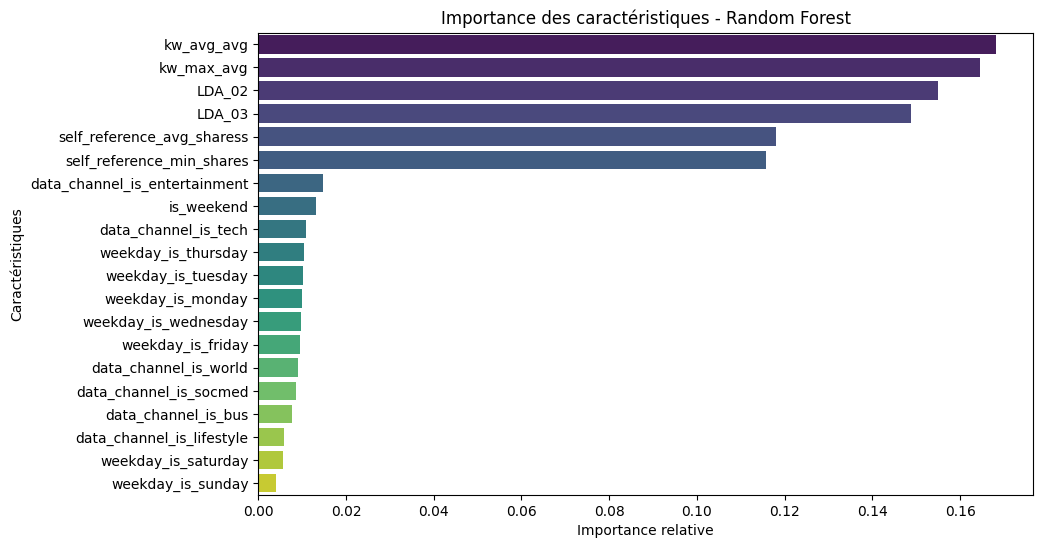

In [73]:
# Importance des caractéristiques
importances = model_corr.feature_importances_

# Créer un DataFrame pour les visualiser
importance_df = pd.DataFrame({
    'Feature': X_train_corr.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Affichage des résultats
print(importance_df)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importance des caractéristiques - Random Forest')
plt.xlabel('Importance relative')
plt.ylabel('Caractéristiques')
plt.show()


**Interprétation** : Les variables kw_avg_avg et kw_max_avg se distinguent comme étant les plus importantes pour expliquer la variabilité de la popularité. D'autres variables, comme LDA_02 et LDA_03, ainsi que des variables binaires telles que data_channel_is_entertainment et is_weekend, montrent également une influence notable. En conclusion, les caractéristiques quantitatives globales et les analyses basées sur des mots-clés jouent un rôle essentiel dans ce modèle.

## **4.2 Importance permutationnelle**
La mesure de l'importance par permutation permet d'évaluer l'impact réel d'une variable sur la performance du modèle en perturbant cette variable et en observant la dégradation des performances. Contrairement à l'indice de Gini, qui mesure la contribution des variables à la réduction de l'impureté dans les arbres, cette méthode capture directement l'effet des variables sur la prédiction finale.

                          Feature  Importance
0                      kw_avg_avg    0.027204
2                      kw_max_avg    0.013533
7   data_channel_is_entertainment    0.011237
5                          LDA_02    0.009951
19                     is_weekend    0.008324
4       self_reference_min_shares    0.006016
9          data_channel_is_socmed    0.005335
3      self_reference_avg_sharess    0.002068
10           data_channel_is_tech    0.001576
6       data_channel_is_lifestyle    0.000757
8             data_channel_is_bus    0.000731
11          data_channel_is_world   -0.000252
17            weekday_is_saturday   -0.000315
18              weekday_is_sunday   -0.001223
14           weekday_is_wednesday   -0.001539
1                          LDA_03   -0.002031
15            weekday_is_thursday   -0.002434
13             weekday_is_tuesday   -0.002737
12              weekday_is_monday   -0.003292
16              weekday_is_friday   -0.004301


<ipython-input-74-e743234ae910>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='viridis')


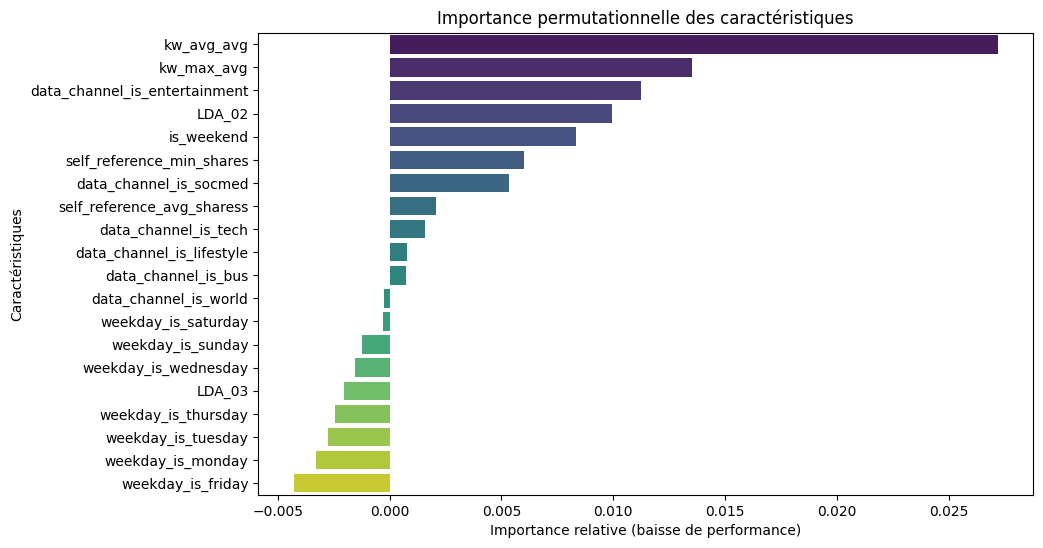

In [74]:
from sklearn.inspection import permutation_importance

# Importance permutationnelle
perm_importance = permutation_importance(model_corr, X_test_corr, y_test, n_repeats=10, random_state=42)

# Créer un DataFrame pour les visualiser
perm_importance_df = pd.DataFrame({
    'Feature': X_train_corr.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Affichage des résultats
print(perm_importance_df)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='viridis')
plt.title('Importance permutationnelle des caractéristiques')
plt.xlabel('Importance relative (baisse de performance)')
plt.ylabel('Caractéristiques')
plt.show()

**Interprétation** : Les résultats confirment que les variables kw_avg_avg et kw_max_avg sont cruciales, comme l'a également montré l'indice de Gini. De plus, la variable data_channel_is_entertainment émerge avec un impact direct significatif, renforçant son importance. En revanche, des variables comme weekday_is_thursday et weekday_is_friday présentent une faible importance selon cet analyse par permutation, ce qui nuance les résultats obtenus avec l'indice de Gini.

# **5. Conclusion**
Au terme de notre analyse, le modèle de Random Forest s'est avéré être le plus performant pour notre tâche de classification. Contrairement aux approches avec réduction de dimension ou sélection préalable des variables, le modèle utilisant l'ensemble complet des variables a obtenu les meilleurs résultats en termes de précision et de robustesse.

L'analyse des importances des variables a permis d'identifier celles qui contribuent le plus à la performance du modèle. Parmi ces variables, kw_avg_avg, kw_max_avg, data_channel_is_entertainment, LDA_02, et self_reference_avg_sharess se distinguent comme des caractéristiques clés, influençant fortement les prédictions. Ces résultats soulignent l'importance des variables quantitatives globales et des informations liées aux chaînes de diffusion.